## IMPORT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA

In [ ]:
#Load data
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/04.%20Week%204/flu/flu.csv"
data = pd.read_csv(url)
print(data.head())

  Diagnosis InitialPCRDiagnosis   Age Sex  neutrophil  \
0      H1N1                 NaN  67.0   F         NaN   
1      H1N1                 NaN  29.0   M         NaN   
2      H1N1                 NaN  22.0   F         NaN   
3      H1N1                 NaN  20.0   F         NaN   
4      H1N1                 NaN  21.0   M         NaN   

   serumLevelsOfWhiteBloodCell  lymphocytes CReactiveProteinLevels  \
0                          NaN          NaN                    NaN   
1                          NaN          NaN                    NaN   
2                          NaN          NaN                    NaN   
3                          NaN          NaN                    NaN   
4                          NaN          NaN                    NaN   

   DurationOfIllness CTscanResults RiskFactors GroundGlassOpacity Diarrhea  \
0                NaN           NaN         NaN                NaN      NaN   
1                NaN           NaN         NaN                NaN      NaN   
2 

## INFO

In [ ]:
# Step 1: Data Inspection
print("Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Feve

## PREPROCESSING DATA

In [ ]:
# Step 2: Data Preprocessing
# Define target and features
target = 'Diagnosis'
features = ['Age', 'Sex', 'Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat',
            'Temperature', 'Fatigue', 'RiskFactors', 'GroundGlassOpacity', 'Diarrhea']

# Filter dataset to include only selected features and target
data = data[[target] + features]

# Encode target variable (H1N1: 0, COVID19: 1)
le = LabelEncoder()
data[target] = le.fit_transform(data[target])

# Handle categorical variables
categorical_cols = ['Sex', 'Fever', 'Coughing', 'ShortnessOfBreath', 'SoreThroat',
                    'Fatigue', 'GroundGlassOpacity', 'Diarrhea']
for col in categorical_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0, 'M': 1, 'F': 0}).fillna(0)  # Impute NaN as 0

# Handle RiskFactors (simplify to binary: 1 if any risk factor, 0 if none)
data['RiskFactors'] = data['RiskFactors'].notnull().astype(int)

# Impute missing values for numerical columns
numerical_cols = ['Age', 'Temperature']
imputer = SimpleImputer(strategy='median')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Check for remaining missing values
print("\nMissing Values After Imputation:")
print(data.isnull().sum())



Missing Values After Imputation:
Diagnosis             0
Age                   0
Sex                   0
Fever                 0
Coughing              0
ShortnessOfBreath     0
SoreThroat            0
Temperature           0
Fatigue               0
RiskFactors           0
GroundGlassOpacity    0
Diarrhea              0
dtype: int64


## VISUAL DATA

<ipython-input-79-42c161edf98b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='Blues')
<ipython-input-79-42c161edf98b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='Blues')
<ipython-input-79-42c161edf98b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='Blues')
<ipython-input-79-42c161edf98b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

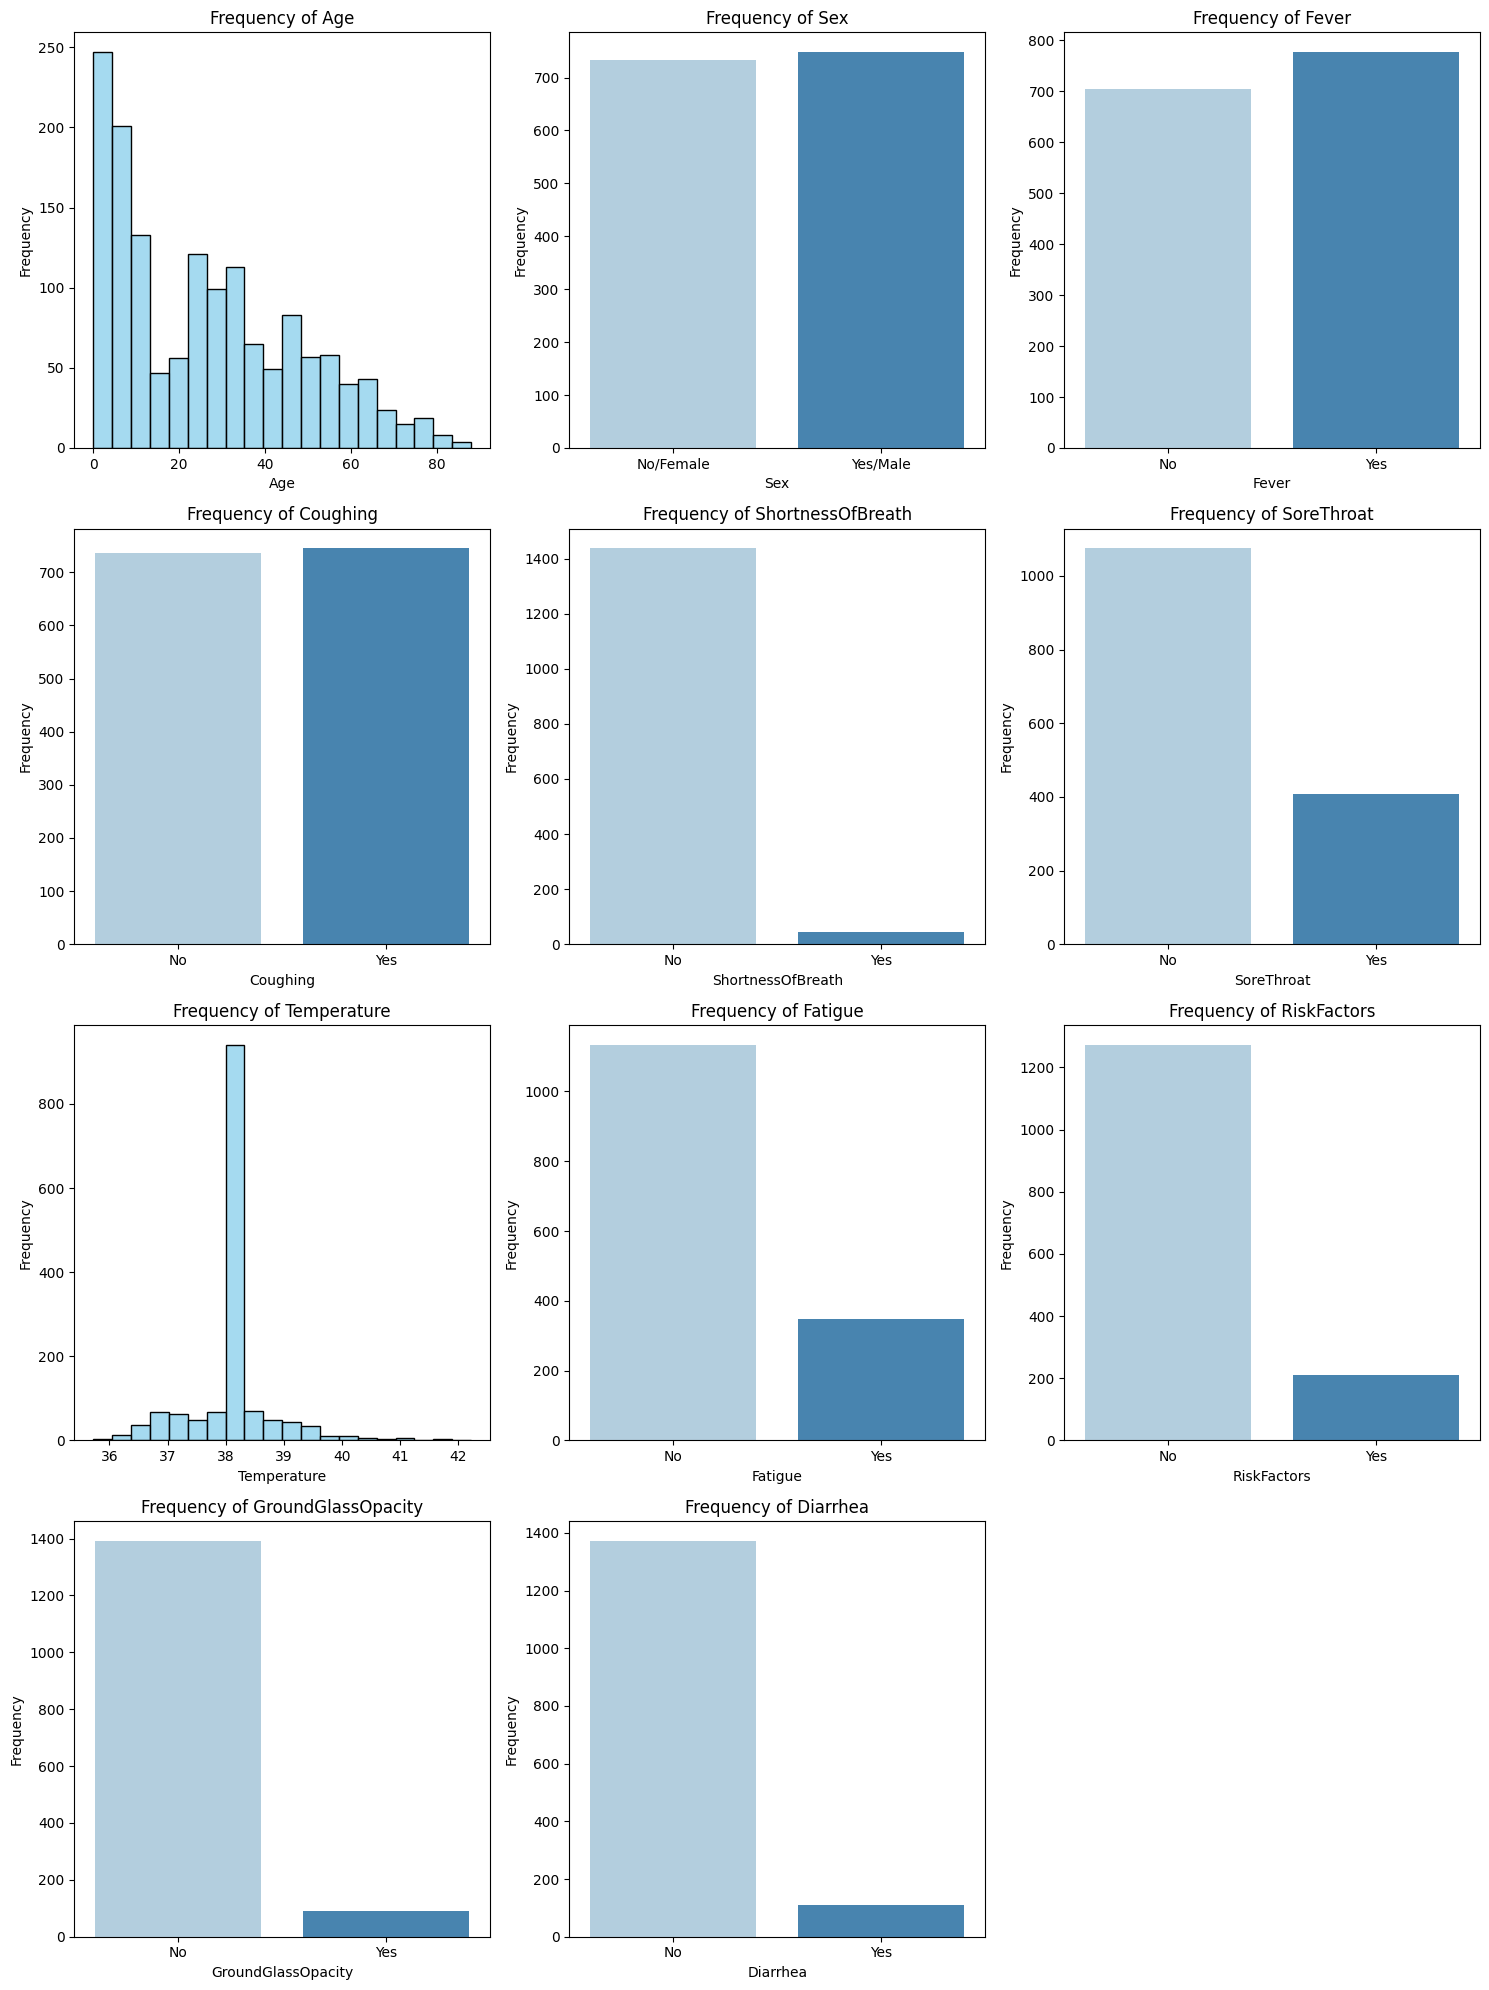

In [ ]:
# Step 2: Create Frequency Visualizations
# Set up the figure and axes for 11 plots (4 rows x 3 columns, last slot empty)
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()  # Flatten for easier iteration

# Define numerical and categorical features
numerical_features = ['Age', 'Temperature']
categorical_features = [f for f in features if f not in numerical_features]

# Plot frequency for each feature
for i, feature in enumerate(features):
    if feature in numerical_features:
        # Histogram for numerical features
        sns.histplot(data=data, x=feature, ax=axes[i], color='skyblue', bins=20)
        axes[i].set_title(f'Frequency of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
    else:
        # Bar plot for categorical/binary features
        counts = data[feature].value_counts().sort_index()
        labels = ['No/Female', 'Yes/Male'] if feature == 'Sex' else ['No', 'Yes']
        sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='Blues')
        axes[i].set_title(f'Frequency of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(labels)

# Remove the last (empty) subplot
fig.delaxes(axes[-1])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## CORRELATION

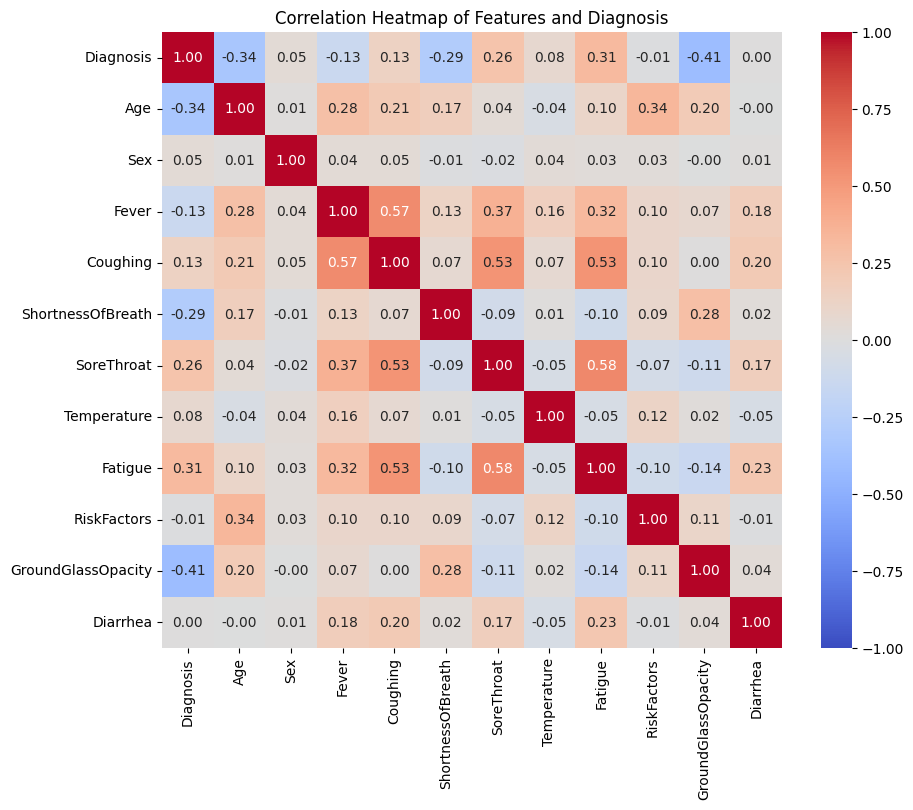


Correlations with Diagnosis:
Diagnosis             1.000000
GroundGlassOpacity    0.411156
Age                   0.336432
Fatigue               0.314125
ShortnessOfBreath     0.286143
SoreThroat            0.255486
Coughing              0.133061
Fever                 0.133017
Temperature           0.077819
Sex                   0.045062
RiskFactors           0.013779
Diarrhea              0.002485
Name: Diagnosis, dtype: float64


In [ ]:
# Compute Correlation Matrix
# Calculate Pearson correlation matrix
corr_matrix = data.corr()

# Visualize Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Features and Diagnosis')
plt.show()

# Highlight Correlations with Diagnosis
corr_matrix = abs(corr_matrix)
print("\nCorrelations with Diagnosis:")
print(corr_matrix[target].sort_values(ascending=False))

## MODEL

In [ ]:
# Step 3: Split Data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
# Step 4: Train Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Step 5: Evaluate Model
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model Evaluation:
Accuracy: 0.8471910112359551

Classification Report:
              precision    recall  f1-score   support

     COVID19       0.86      0.58      0.69       132
        H1N1       0.85      0.96      0.90       313

    accuracy                           0.85       445
   macro avg       0.85      0.77      0.80       445
weighted avg       0.85      0.85      0.84       445



## MODEL EVALUASI

### AKURASI

- Akurasi
  - Nilai = 84,72%
  - Penjelasan:
    - Akurasi adalah persentase prediksi yang benar (baik pasien yang benar-benar COVID19 maupun H1N1) dari total prediksi.
    - Dengan akurasi 84,72%, artinya model berhasil memprediksi diagnosis dengan benar untuk 84,72% data uji.
    - Meskipun akurasi ini cukup baik, akurasi saja tidak cukup untuk menilai performa model, terutama jika data tidak seimbang (jumlah pasien H1N1 lebih banyak dibandingkan COVID19).


### LAPORAN KLASIFIKASI

-  Laporan Klasifikasi
 - Laporan ini memberikan metrik detail untuk masing-masing kelas (COVID19 dan H1N1) serta rata-rata keseluruhan. Metrik yang digunakan adalah presisi, recall, f1-score, dan support.
 - Metrik per Kelas:


#### COVID19

- **COVID19:**
  - **Presisi: 0.86**
    - Presisi mengukur seberapa banyak prediksi COVID19 yang benar-benar COVID19.
    - Presisi 0,86 berarti 86% dari pasien yang diprediksi sebagai COVID19 oleh model memang benar-benar COVID19. Sisanya 14% adalah prediksi salah (sebenarnya H1N1, tetapi diprediksi COVID19).
  - **Recall: 0.58**
    - Recall mengukur seberapa banyak pasien yang benar-benar COVID19 yang berhasil dikenali oleh model.
    - Recall 0,58 berarti model hanya berhasil mengenali 58% dari pasien yang benar-benar COVID19. Artinya, 42% pasien COVID19 tidak terdeteksi (diprediksi sebagai H1N1).
  - **F1-Score: 0,69**
    - F1-score adalah rata-rata harmonik dari presisi dan recall, memberikan gambaran keseimbangan keduanya.
    - F1-score 0,69 menunjukkan performa sedang untuk COVID19, karena recall yang rendah (0,58) menurunkan nilai ini meskipun presisi cukup tinggi (0,86).
  - **Support: 132**
    - Support adalah jumlah sampel aktual untuk kelas ini di data uji.
    - Ada 132 pasien yang benar-benar COVID19 di data uji.

#### H1N1

- **H1N1:**
  - Presisi: 0,85
    - 85% dari pasien yang diprediksi sebagai H1N1 memang benar-benar H1N1. Sisanya 15% adalah prediksi salah (sebenarnya COVID19).
  - Recall: 0,96
    - Model berhasil mengenali 96% dari pasien yang benar-benar H1N1, hanya melewatkan 4% (diprediksi sebagai COVID19).
  - F1-Score: 0,90
    - F1-score 0,90 menunjukkan performa yang sangat baik untuk H1N1, karena presisi (0,85) dan recall (0,96) keduanya tinggi.
  - Support: 313
    - Ada 313 pasien yang benar-benar H1N1 di data uji.

### METRIK RATA-RATA

Metrik Rata-rata:
  - Akurasi: 0.85
  - Macro AVG:
    - Presisi: 0.85
    - Recall: 0.77
    - F1-Score: 0.8
    - Rata-rata makro memperlakukan kedua kelas sama, tanpa mempedulikan ketidakseimbangan jumlah sampel.
  - Weighted Avg:
    - Presisi: 0.85
    - Recall: 0.85
    - F1-Score: 0.84
    - Rata-rata tertimbang memperhitungkan ketidakseimbangan kelas dengan memberi bobot lebih pada kelas dengan jumlah sampel lebih besar (H1N1).



### PERFORMA MODEL

- Akurasi Keseluruhan:
  - Dengan akurasi 84,72%, model cukup baik, tetapi akurasi saja bisa menyesatkan karena data tidak seimbang (313 H1N1 vs. 132 COVID19, rasio sekitar 70:30).
- Ketidakseimbangan Kelas:
  - Data uji memiliki lebih banyak kasus H1N1 (313) dibandingkan COVID19 (132). Ketidakseimbangan ini membuat model cenderung lebih baik dalam memprediksi H1N1, seperti terlihat dari recall yang tinggi untuk H1N1 (0,96) dan rendah untuk COVID19 (0,58).
- Performa untuk COVID19:
  - Presisi (0,86) tinggi, artinya ketika model memprediksi COVID19, kebanyakan prediksinya benar.
  - Namun, recall (0,58) rendah, artinya model melewatkan banyak kasus COVID19 (42% diprediksi sebagai H1N1).
  - F1-score (0,69) menunjukkan performa sedang, karena recall yang rendah menurunkan nilai ini.
- Performa untuk H1N1:
  - Presisi (0,85) dan recall (0,96) keduanya tinggi, menghasilkan F1-score yang sangat baik (0,90).
  - Model sangat efektif dalam mengenali kasus H1N1, hanya melewatkan 4% kasus.
- Makro vs Tertimbang:
  - Rata-rata makro (presisi: 0,85, recall: 0,77, F1: 0,80) menunjukkan performa model tanpa mempedulikan ketidakseimbangan kelas. Recall yang rendah (0,77) dipengaruhi oleh recall rendah untuk COVID19 (0,58).
  - Rata-rata tertimbang (presisi: 0,85, recall: 0,85, F1: 0,84) lebih tinggi karena memberi bobot lebih pada H1N1 (313 sampel) yang performanya lebih baik.

##CONFUSION MATRIX

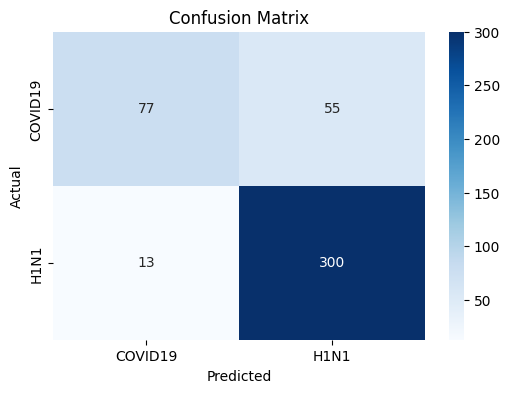

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ROC CURVE

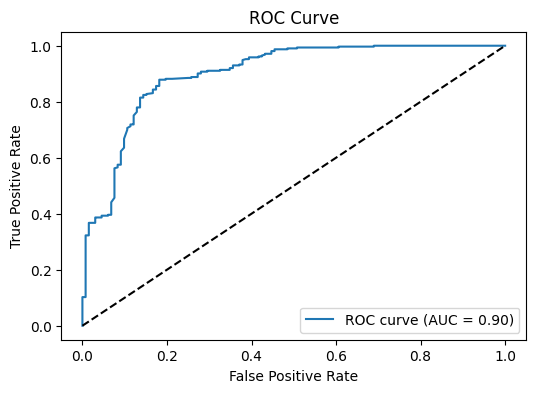

In [ ]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Step 6: Feature Importance (Coefficients)
coef = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
print("\nFeature Coefficients:")
print(coef.sort_values(by='Coefficient', ascending=False))


Feature Coefficients:
               Feature  Coefficient
7              Fatigue     2.848666
8          RiskFactors     1.295234
5           SoreThroat     0.875464
3             Coughing     0.723832
1                  Sex     0.365667
6          Temperature     0.290802
0                  Age    -0.816612
10            Diarrhea    -0.821356
2                Fever    -1.265385
4    ShortnessOfBreath    -1.884690
9   GroundGlassOpacity    -3.329905


## PENJELASAN MATEMATIKA

- Akurasi:
  - Definisi: Definisi: Akurasi adalah rasio antara jumlah prediksi yang benar (baik untuk kelas positif maupun negatif) dengan total jumlah prediksi.
  - Rumus:
  - 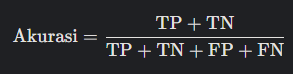
    - TP (True Positive): Jumlah kasus yang benar-benar COVID19 dan diprediksi COVID19.
    - TN (True Negative): Jumlah kasus yang benar-benar H1N1 dan diprediksi H1N1.
    - FP (False Positive): Jumlah kasus yang sebenarnya H1N1 tetapi diprediksi COVID19.
    - FN (False Negative): Jumlah kasus yang sebenarnya COVID19 tetapi diprediksi H1N1.
- Presisi
  - Definisi: Presisi mengukur seberapa banyak prediksi positif yang benar-benar benar, yaitu rasio antara prediksi positif yang benar dengan total prediksi positif.
  - Remus:
  - 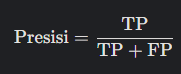
- Recall
  - Definisi: Recall mengukur seberapa banyak kasus positif yang berhasil dikenali oleh model, yaitu rasio antara prediksi positif yang benar dengan total kasus positif yang sebenarnya.
  - Rumus:
  - 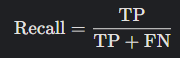
- F1-Score
  - Definisi: F1-Score adalah rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara kedua metrik ini. F1-Score lebih representatif daripada akurasi untuk data yang tidak seimbang.
  - Rumus.
  - 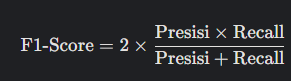
- AUC (Area Under the Curve)
  - Definisi: AUC adalah luas di bawah kurva ROC (Receiver Operating Characteristic). AUC mengukur kemampuan model untuk membedakan antara kelas positif (COVID19) dan negatif (H1N1), dengan nilai berkisar antara 0 hingga 1.
    - AUC = 1: Pemisahan sempurna antara kelas.
    - AUC = 0,5: Model tidak lebih baik dari tebakan acak.
  - Rumus:
  - 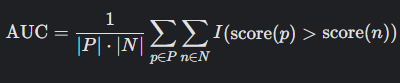
- ROC (Receiver Operating Characteristic Curve)
  - Definisi: Kurva ROC adalah grafik yang menunjukkan hubungan antara True Positive Rate (TPR) (yaitu Recall) pada sumbu y dan False Positive Rate (FPR) pada sumbu x, untuk berbagai ambang batas probabilitas prediksi.
  - Rumus:
    - Untuk setiap ambang batas probabilitas 𝑡 (misalnya, model memprediksi COVID19 jika probabilitas > 𝑡):
    - 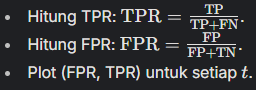
    - Garis diagonal (dari (0,0) ke (1,1)) menunjukkan performa acak (AUC = 0,5).